In [1]:
# Installing UMAP
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00


In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import umap
from mpl_toolkits.mplot3d import Axes3D


In [9]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [15]:
y_e = le.fit_transform(y)

In [14]:
path = '/kaggle/input/cats-project/CATS_data.csv'

df = pd.read_csv(path)

In [4]:
# Splitting the labels from the features

y= df.iloc[:,0]
X = df.iloc[:,1:]

In [5]:
# Meancenter and scale by sd

scaler = StandardScaler()
X_scaled_centered = scaler.fit_transform(X)

<Axes: >

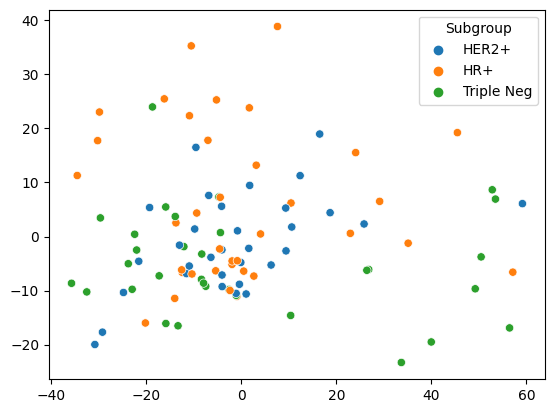

In [6]:
# Plotting 1st 2 PCs

pca = PCA()
pca_decomp = pca.fit_transform(X_scaled_centered)
sns.scatterplot(x= pca_decomp[:,0], y = pca_decomp[:,1], hue = y)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

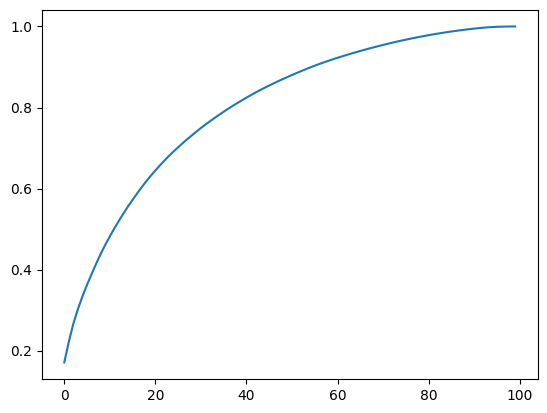

In [33]:
# Variance explained by PCs
# Individual PCs explain very little variation in the data

sns.lineplot(pca.explained_variance_ratio_.cumsum())

In [35]:
import plotly.express as px
import pandas as pd


fig = px.scatter_3d(df, x=pca_decomp[:,0], y=pca_decomp[:,1], z=pca_decomp[:,2], color=y, color_discrete_sequence=px.colors.qualitative.Vivid)


fig.show()

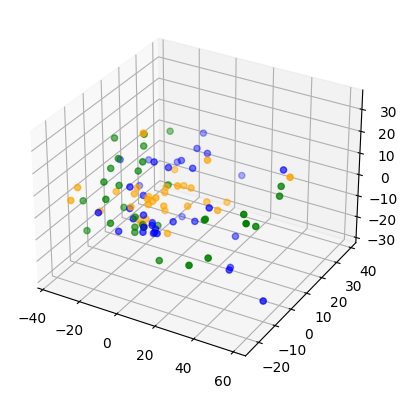

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(pca_decomp[:, 0], pca_decomp[:, 1], pca_decomp[:, 2], c = y.map({'HER2+': "orange", 'HR+': 'b', 'Triple Neg': 'g'}))




plt.show()

<Axes: >

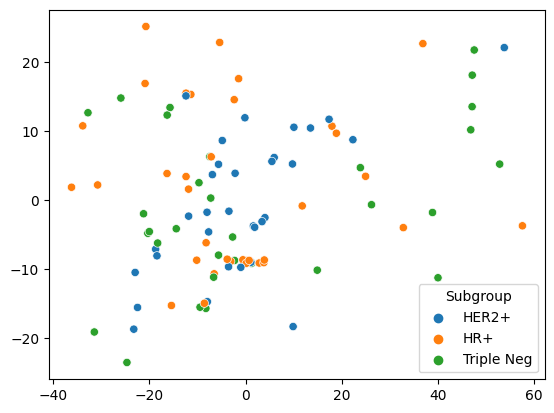

In [16]:
# Sparse PCA (uses L1 regularization)

sparse_pca = SparsePCA(n_components = 2, alpha = 2)
sparse_decomp = sparse_pca.fit_transform(X_scaled_centered)
sns.scatterplot(x= sparse_decomp[:,0], y = sparse_decomp[:,1], hue = y)

<Axes: >

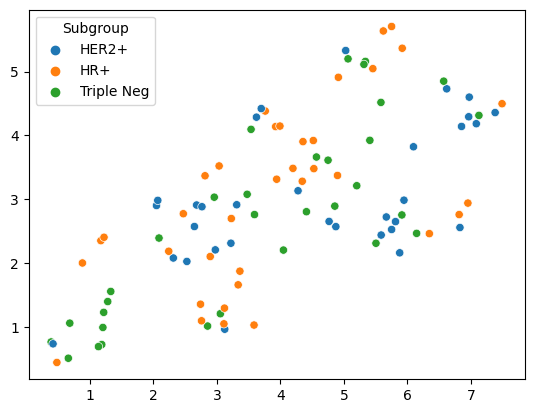

In [17]:
# UMAP I have tried different n_neighbors
reducer = umap.UMAP(n_neighbors = 3)
embedding = reducer.fit_transform(X_scaled_centered)
sns.scatterplot(x= embedding[:,0], y = embedding[:,1], hue = y)

<Axes: >

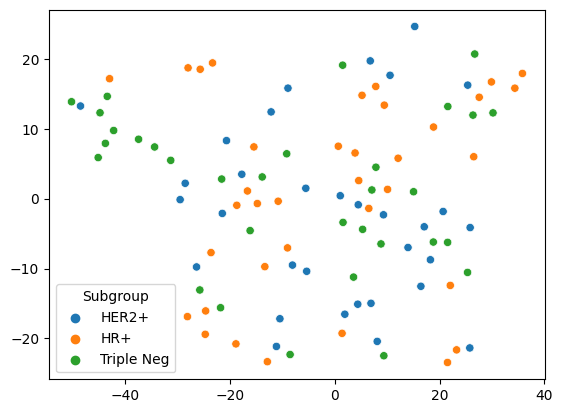

In [18]:
# TSNE, I have tried different perplexities
tsne_reducer = TSNE(perplexity = 3)
tsne_embedding = tsne_reducer.fit_transform(X_scaled_centered)
sns.scatterplot(x= tsne_embedding[:,0], y = tsne_embedding[:,1], hue = y)